<a href="https://colab.research.google.com/github/Klearpixeloff/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capston Project -2**

# SUPERVISED - REGRESSION

# **Project  - Yes bank stock closing price prediction**
**NAME** : ABHISHEK JAIN

**NAME** : KHUSHBOO CHAURASIYA

# Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.


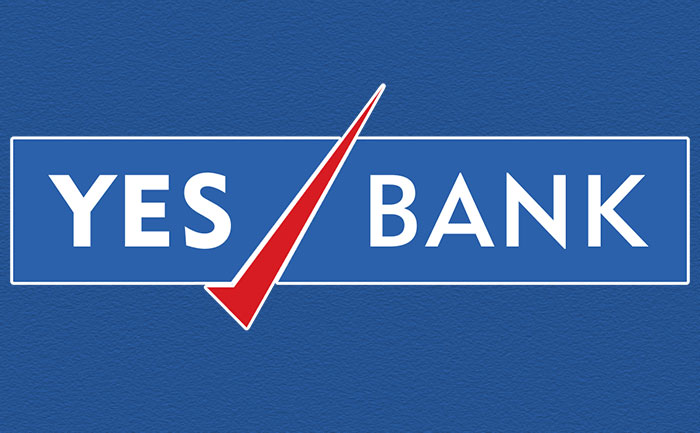



**Project Type - Linear Regression**






# importing libraries

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from numpy import math
from datetime import datetime 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge,        
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,                
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)
from sklearn import metrics
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


# Load the Data

In [486]:
df =pd.read_csv('drive/MyDrive/Data/yesbank.csv')

In [487]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Description of Data

In [488]:
len(df)

185

In [489]:
df.shape

(185, 5)

In [490]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [492]:
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [493]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


# EDA

**Univariate Analysis**

In [494]:
ax= px.line(df, df['Date'], df['Close'], title='Monthly closing price')
ax.update_layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='closing price')
)


ax.show()

In [495]:


fig=px.box(df['Open'])
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()








In [496]:
fig=px.box(np.log10(df['Open']),title='applied log10')
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

In [497]:
fig=px.box(df['Low'])
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

In [498]:
fig=px.box(np.log10(df['Low']),title='applied log10')
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

In [499]:
fig=px.box(df['High'])
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

In [500]:
fig=px.box(np.log10(df['High']),title='applied log10')
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

In [501]:
fig=px.box(df['Close'])
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

In [502]:
fig=px.box(np.log10(df['Close']),title='applied log10')
fig.update_layout(
    xaxis=dict(title='Boxplot')
)
fig.show()

Text(0.5, 1.0, 'Closing Price Distribution')

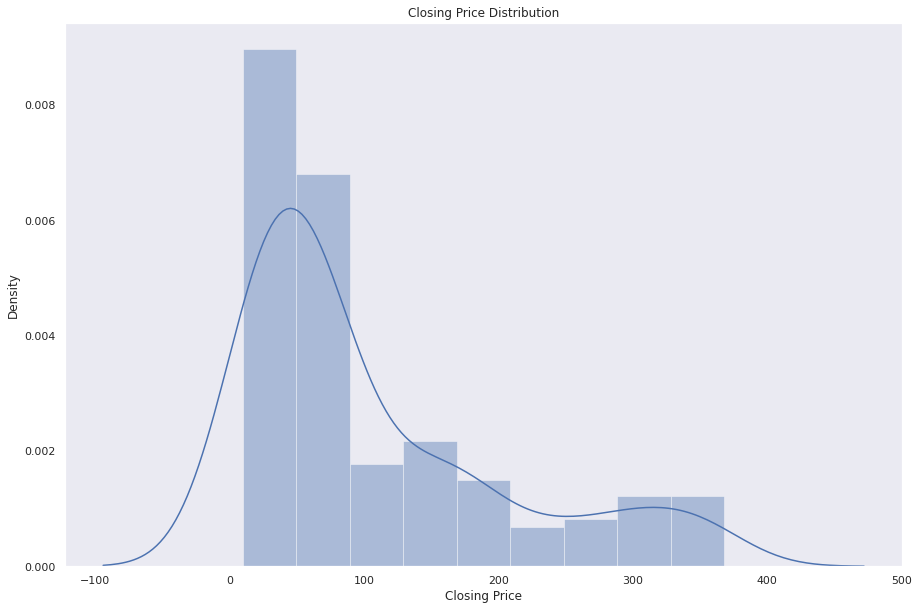

In [503]:




plt.figure(figsize=(15,10))
sns.set(style='dark',)
sns.distplot(df['Close'],kde='True')
plt.xlabel('Closing Price')
plt.title('Closing Price Distribution')




Text(0.5, 1.0, 'Closing Price Distribution')

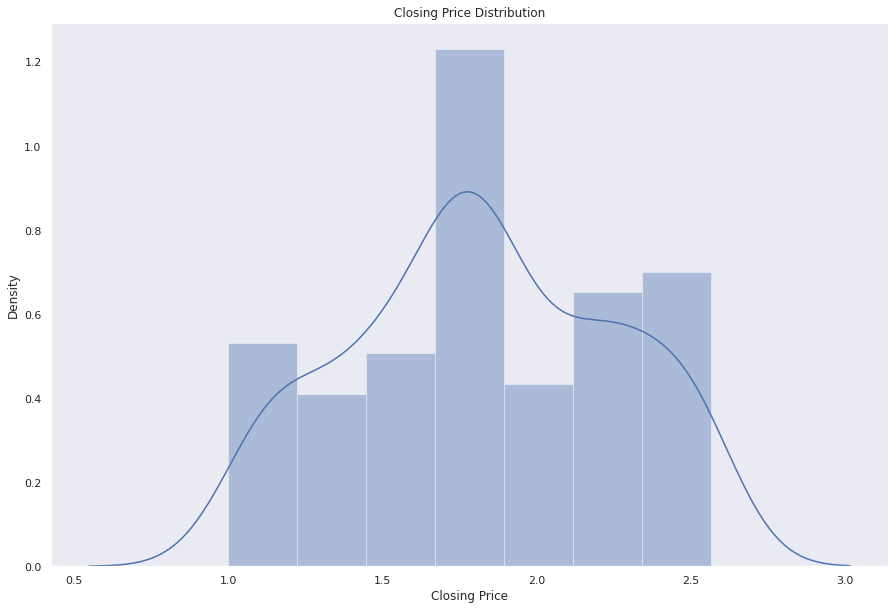

In [504]:
plt.figure(figsize=(15,10))
sns.set(style='dark',)
sns.distplot(np.log10(df['Close']),kde='True')
plt.xlabel('Closing Price')
plt.title('Closing Price Distribution')

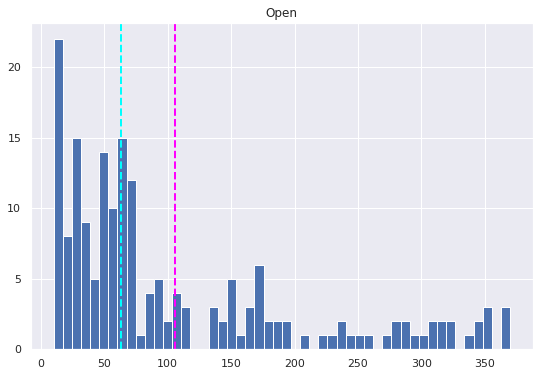

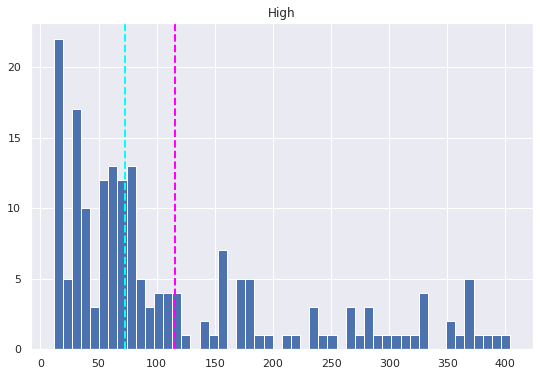

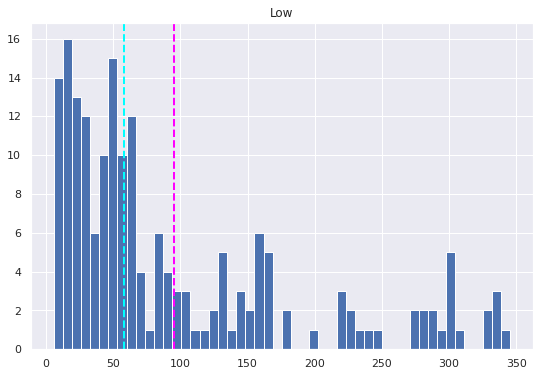

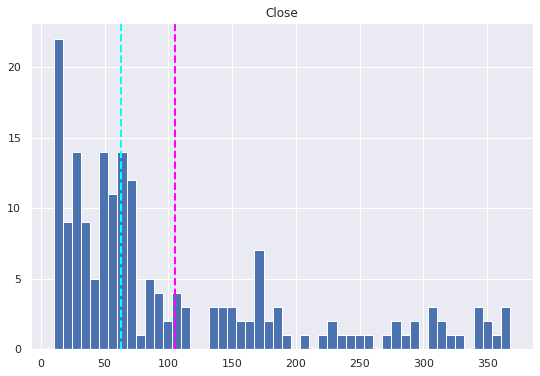

In [505]:
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

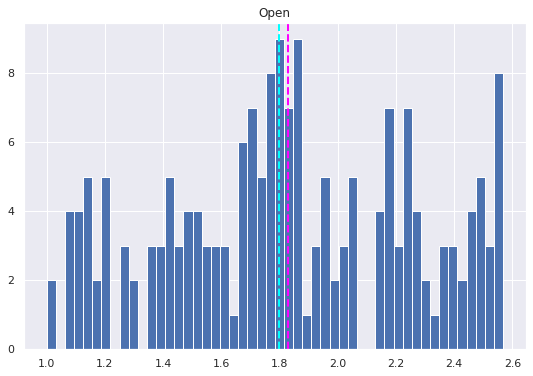

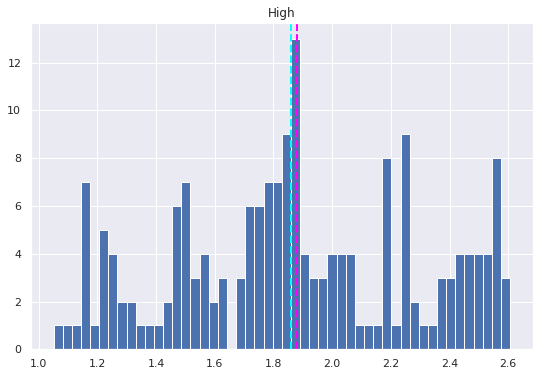

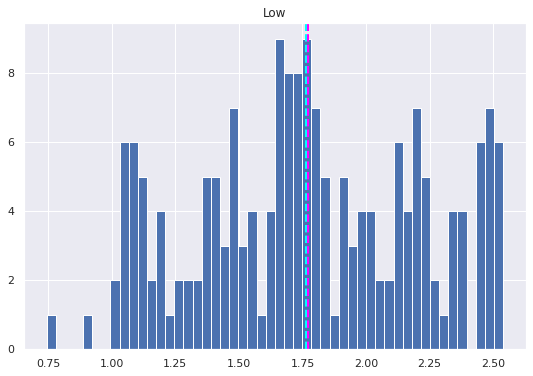

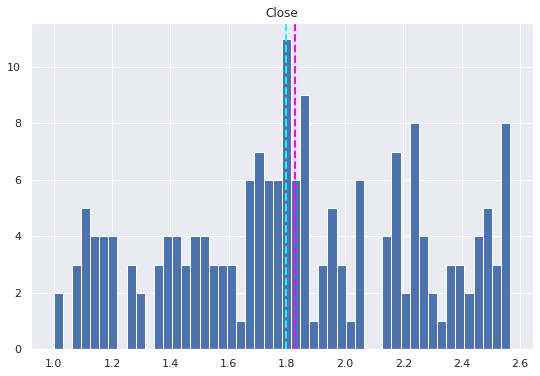

In [506]:
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**Bivariate** **Analysis**

In [507]:
fig=px.scatter(df,x='Open',y='Close',title='Relations between Open and Close')
fig.update_layout(autosize=False,width=1000,height=500
)
fig.show()





In [508]:
fig=px.scatter(df,x='Low',y='Close',title='Relations between Low and Close')
fig.update_layout(autosize=False,width=1000,height=500
)
fig.show()

In [509]:
fig=px.scatter(df,x='High',y='Close',title='Relations between High and Close')
fig.update_layout(autosize=False,width=1000,height=500
)
fig.show()

# Multicollinearity

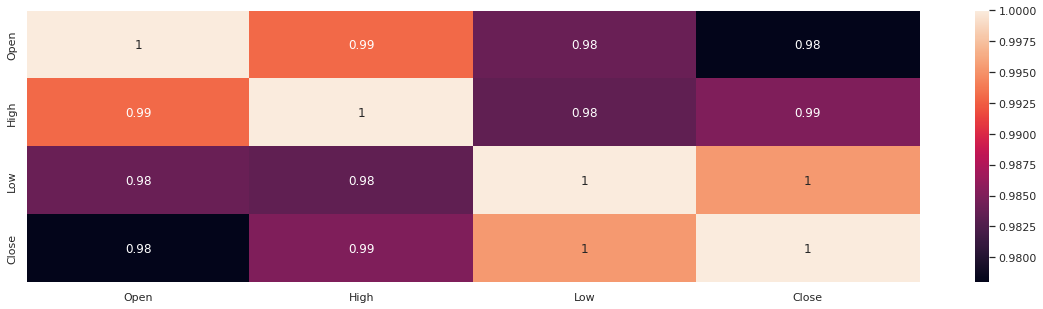

In [510]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

# Data Preprocessing

In [511]:
df.set_index('Date',inplace=True)

In [512]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [513]:
dependent_variable = 'Close'
independent_variable = list(set(df.columns.tolist())-{dependent_variable})

In [514]:
x=np.log10(df[independent_variable]).values

In [515]:
y=np.log10(df[dependent_variable]).values

In [516]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Features Scaling

In [517]:
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Linear Regression

In [518]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [519]:
y_pred = reg.predict(x_test)

In [520]:
def act(x):
  return 10**(x)

In [521]:
act(y_test)

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [522]:
act(y_pred)

array([ 30.99022321, 139.52578767,  47.20003592, 138.76152873,
        66.37639853,  32.206864  , 230.16454023,  16.42303081,
        13.71334173, 224.1008932 , 298.51460785,  88.88870295,
       150.66523923,  58.19270977, 334.91417497, 267.4982992 ,
        72.58931932,  27.6478609 , 269.36866298,  50.86829167,
         9.36641666, 118.27864101, 150.80557678,  58.74722774,
       215.69416746,  52.38597016, 254.18932917,  13.25902053,
       106.83558252,  52.83631572, 373.11141493, 355.02808635,
        73.66401224, 166.69688337,  38.94179495,  47.31812705,
       257.53151773])

In [523]:
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual_Value', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

# Model Evaluation

In [524]:
mse = mean_squared_error(act(y_test),act(y_pred))

In [525]:
mse

70.4204061614538

In [526]:
mae = mean_absolute_error(act(y_test),act(y_pred))

In [527]:
mae

4.816779252269783

In [528]:
rmse = math.sqrt(mean_squared_error(act(y_test),act(y_pred)))

In [529]:
rmse

8.391686729225167

In [530]:
r2_score= r2_score(act(y_test),act(y_pred))

In [531]:
r2_score

0.9937436908107394

In [532]:
estimate = pd.DataFrame({'Mean squared error':[mse],'Root mean Sqaured Error': [rmse],'mean absolute error': [mae],'r2_score':[r2_score]})

In [533]:
estimate

,Mean squared error,Root mean Sqaured Error,mean absolute error,r2_score
0,70.420406,8.391687,4.816779,0.993744


# Regularization

# **Ridge Regression** with cross validation

In [534]:
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [535]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [536]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [537]:
act(y_pred_ridge)

array([ 31.24172381, 140.50190104,  48.32157545, 138.82577298,
        65.92203696,  31.86056309, 230.48546076,  16.43869488,
        13.77138793, 220.03473107, 299.76657713,  90.09100546,
       150.89683541,  58.45981495, 335.85226997, 264.27559915,
        72.61670858,  27.52225486, 265.64639311,  51.10166529,
         9.43014977, 117.99848231, 151.25491859,  58.45679184,
       215.01056493,  50.79983572, 254.87946161,  13.34705456,
       107.05206934,  53.52431469, 371.95749606, 348.70626322,
        73.1213101 , 167.23376997,  38.90906224,  47.54843919,
       257.29194913])

In [538]:
act(y_test)

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [539]:
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(metrics.r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)



Mean Absolute Error : 5.0306
Mean squared Error : 70.7646
Root Mean squared Error : 8.4122
R2 score : 0.9937


In [540]:
y_test=act(y_test)

In [541]:
y_pred_ridge=act(y_pred_ridge)

In [542]:
fig = px.scatter(x=y_test, y=y_pred_ridge, labels={'x': 'Actual_Value', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

# lasso Regression

In [543]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [544]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [545]:
act(y_pred_lasso)

array([ 30.99027448, 139.52600174,  47.200244  , 138.76156917,
        66.3763144 ,  32.20679462, 230.16464339,  16.42303665,
        13.71335548, 224.10006895, 298.51490427,  88.8889394 ,
       150.66531427,  58.19277052, 334.91443834, 267.49766599,
        72.58933683,  27.64783825, 269.36792185,  50.86834085,
         9.36642866, 118.27859695, 150.80566314,  58.74717679,
       215.69406871,  52.38560588, 254.18948026,  13.25904064,
       106.83564147,  52.8364536 , 373.11122148, 355.02681411,
        73.6639086 , 166.69701267,  38.94179206,  47.31817909,
       257.53152374])

In [546]:
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [547]:
MAE_lasso = round(mean_absolute_error(y_test,10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_lasso  = round(mean_squared_error(y_test,10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_lasso = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_lasso = round(metrics.r2_score(y_test, 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_ridge)

Mean Absolute Error : 5.0306
Mean squared Error : 70.7646
Root Mean squared Error : 8.4122
R2 score : 0.9937


In [548]:
fig = px.scatter(x=y_test, y=act(y_pred_lasso), labels={'x': 'Actual_Value', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

# Elasticnet Regression

In [549]:
elastic =ElasticNet(alpha=0.1, l1_ratio=0.5)
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [550]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [551]:
act(y_pred_elastic)

array([ 31.03243061, 139.69168961,  47.38450633, 138.77601791,
        66.3009081 ,  32.14854426, 230.22358656,  16.42602323,
        13.72335586, 223.41307154, 298.73051473,  89.08894351,
       150.70793586,  58.23843817, 335.08157657, 266.95696987,
        72.59553416,  27.62709291, 268.74173136,  50.90771987,
         9.37698442, 118.23321495, 150.88039865,  58.69938637,
       215.58446649,  52.11081961, 254.30673403,  13.2740951 ,
       106.87398092,  52.95126822, 372.92262399, 353.96005542,
        73.57340395, 166.78979765,  38.93679676,  47.35750798,
       257.49856094])

In [552]:
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [553]:
MAE_elastic_net = round(mean_absolute_error((y_test),10**(y_pred_elastic)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error((y_test),10**(y_pred_elastic)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(metrics.r2_score((y_test), (10**y_pred_elastic)),4)
print("R2 score :" ,R2_elastic_net)



Mean Absolute Error : 4.8524
Mean squared Error : 70.1309
Root Mean squared Error : 8.3744
R2 score : 0.9938


In [554]:
fig = px.scatter(x=y_test, y=act(y_pred_elastic), labels={'x': 'Actual_Value', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

# Evaluation Summary

In [555]:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[mae,MAE_ridge,MAE_lasso,MAE_elastic_net], 'mse':[mse,MSE_ridge,MSE_lasso,MSE_elastic_net],'r2_score':[r2_score,R2_ridge,R2_lasso,R2_elastic_net],'Rmse':[rmse,RMSE_ridge,RMSE_lasso,RMSE_elastic_net]})
Report

,model,mae,mse,r2_score,Rmse
0,linear regression,4.816779,70.420406,0.993744,8.391687
1,ridge regression,5.030600,70.764600,0.993700,8.412200
2,lasso regression,4.816800,70.420000,0.993700,8.412200
3,elastic net regression,4.852400,70.130900,0.993800,8.374400


# **Conclusions Drawn :**
---

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**
*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and *Elastic Net regressor is the best performing model with A R2 score value of 0.9938* and scores well on all evaluation metrics.** 

